# 🧠 Análisis Predictivo del Bienestar y Estilo de Vida — *Work-Life Balance Model*

## 📘 Introducción

Este notebook presenta un proyecto completo de **modelado predictivo** basado en el dataset **"Wellbeing and Lifestyle Data" (Kaggle)**.  
El objetivo principal es **predecir el puntaje de equilibrio vida-trabajo (`WORK_LIFE_BALANCE_SCORE`)** a partir de variables relacionadas con hábitos, salud, logros personales y condiciones sociales.

### 🔍 Enfoque general del proyecto:
1. **Preparación de datos:** limpieza, codificación y separación de variables predictoras (`X`) y objetivo (`y`).  
2. **Entrenamiento inicial (Baseline):** comparación de distintos modelos de regresión (Lineal, Ridge, RandomForest, MLP, etc.).  
3. **Optimización (Tuning):** ajuste de hiperparámetros para mejorar la precisión del modelo.  
4. **Selección y evaluación final:** comparación justa entre el modelo base y el optimizado, eligiendo el de mejor rendimiento.  
5. **Análisis interpretativo:** evaluación de la importancia de las variables, errores individuales y comportamiento por subgrupos.

### ⚙️ Tecnologías utilizadas:
- **Python / scikit-learn / imbalanced-learn** para la construcción y validación del modelo.  
- **XGBoost, LightGBM y CatBoost** para pruebas avanzadas de regresión.  
- **Matplotlib y Pandas** para análisis exploratorio y visualización.  

### 🎯 Resultado esperado:
El notebook busca construir un modelo **preciso, interpretable y estable**, capaz de identificar los factores que más influyen en el bienestar personal y laboral.  
Además, se incluye un análisis de **error y equidad por subgrupos**, garantizando que el modelo sea confiable y ético en su aplicación.

---


# 🧭 Paso 1: Cargar los datos y definir la variable objetivo

En este primer bloque, se prepara el entorno de trabajo y se cargan los datos desde el archivo CSV **“Wellbeing_and_lifestyle_data_Kaggle.csv”**.  
El objetivo es tener el conjunto de datos listo para los siguientes pasos del análisis predictivo.

---

### 🔹 Objetivo del paso
1. Importar las librerías necesarias (`numpy`, `pandas`, `os`, etc.).
2. Establecer una semilla aleatoria (`RANDOM_STATE = 42`) para garantizar reproducibilidad.
3. Cargar el archivo CSV y revisar su estructura inicial.
4. Convertir variables categóricas (`DAILY_STRESS`, `AGE`, `GENDER`) a formato numérico.
5. Separar la variable **objetivo** (`WORK_LIFE_BALANCE_SCORE`) de las variables **predictoras** (`X`).

---

### 📘 Explicación del código

- `warnings.filterwarnings("ignore")` → suprime avisos para mantener la salida limpia.  
- `assert os.path.exists(DATA_FILE)` → verifica que el archivo exista antes de cargarlo.  
- `df.info()` → muestra un resumen con el número de filas, tipos de datos y columnas.

Después de convertir las variables categóricas:
- `DAILY_STRESS` y `AGE` pasan de tipo *object* a *int8* (valores numéricos codificados).  
- `GENDER` se mapea a 0 = *Female*, 1 = *Male*.  
- El resto de variables ya son numéricas, por lo que no requieren transformación.

---

In [8]:
# =========================================
# 1) Cargar datos y objetivo
# =========================================
import os, json, warnings, platform, datetime
import numpy as np
import pandas as pd
import joblib
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Archivo y variable objetivo
DATA_FILE = "Wellbeing_and_lifestyle_data_Kaggle.csv"     # <-- tu archivo limpio
TARGET    = "WORK_LIFE_BALANCE_SCORE"                     # variable objetivo numérica
assert os.path.exists(DATA_FILE), f"No se encuentra {DATA_FILE}"

# Cargar datos
df = pd.read_csv(DATA_FILE)
df.info()

# =========================================
# Adaptación a tus columnas reales
# =========================================
# El dataset no tiene 'clase_salario', por eso lo eliminamos
# En su lugar, codificamos las variables categóricas relevantes

# Convertir variables categóricas a numéricas
df["DAILY_STRESS"] = df["DAILY_STRESS"].astype("category").cat.codes
df["AGE"] = df["AGE"].astype("category").cat.codes
df["GENDER"] = df["GENDER"].map({"Female": 0, "Male": 1})

# Verificar resultado
df.info()

# =========================================
# Definir variable objetivo y predictoras
# =========================================
y  = df[TARGET]
X  = df.drop(columns=[TARGET, "Timestamp"])

print("Shape:", X.shape,
      "| y(mean):", round(y.mean(), 4),
      "| y(std):", round(y.std(), 4),
      "| y[min,max]:", (round(y.min(), 4), round(y.max(), 4)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

### 📊 Resultados principales

- **Registros:** 15,972  
- **Columnas totales:** 24  
- **Variables predictoras (X):** 22 columnas (tras eliminar `Timestamp` y la variable objetivo).  
- **Variable objetivo (y):** `WORK_LIFE_BALANCE_SCORE` (numérica continua).

El resumen final del dataset fue:

Shape: (15972, 22) | y(mean): 666.7515 | y(std): 45.0199 | y[min,max]: (480.0, 820.2)


Esto significa:
- El conjunto tiene **15,972 observaciones** y **22 variables predictoras**.  
- El puntaje promedio de bienestar laboral (`WORK_LIFE_BALANCE_SCORE`) es de **666.75** puntos, con una desviación estándar de **45.02**, y valores entre **480.0 y 820.2**.

---

### 💡 Interpretación
El dataset está **limpio, completo y numérico**, lo que lo hace ideal para aplicar algoritmos de regresión.  
Las conversiones categóricas aseguran que los modelos puedan procesar todas las variables sin errores de tipo.  
Este paso deja listo el entorno para dividir los datos en entrenamiento y prueba (que se realiza en el siguiente bloque).


## 🧩 Explicación del código `X, y`

Este bloque ejecuta la instrucción `X, y` para **visualizar el contenido de las dos estructuras de datos principales** creadas en el paso anterior:

- **`X`** contiene todas las **variables predictoras**, es decir, las columnas que se usarán para entrenar el modelo y explicar el comportamiento del bienestar laboral.  
- **`y`** es la **variable objetivo** que el modelo intentará predecir: `WORK_LIFE_BALANCE_SCORE`.

En el código anterior (`Code 1`), se eliminaron las columnas `Timestamp` y la variable objetivo del conjunto `X` para evitar duplicidades, mientras que `y` quedó con los valores de la columna que representa el equilibrio vida–trabajo.

Al ejecutar `X, y`, Jupyter muestra una vista combinada:  
primero una parte del DataFrame `X` (variables independientes), y después la Serie `y` (variable dependiente).

In [9]:
X , y

(       FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
 0                   3             3               2            5   
 1                   2             4               4            3   
 2                   2             4               3            4   
 3                   3             4              10            3   
 4                   5             1               3            3   
 ...               ...           ...             ...          ...   
 15967               3             4               0            4   
 15968               3             4               6            8   
 15969               4             4               0           10   
 15970               1             1              10            8   
 15971               5             5               0            2   
 
        SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  \
 0                      0               5            2         0          1   
 1          

## 📊 Interpretación del resultado

El resultado confirma que la separación de variables se realizó correctamente:

- **`X` (predictoras):**  
  Contiene **22 columnas numéricas**, todas relacionadas con hábitos, emociones o condiciones de bienestar.  
  Ejemplos:  
  - `FRUITS_VEGGIES`: consumo de frutas y verduras.  
  - `DAILY_STRESS`: nivel de estrés diario (ya codificado numéricamente).  
  - `BMI_RANGE`: rango de índice de masa corporal.  
  - `SLEEP_HOURS`, `DAILY_STEPS`, `SOCIAL_NETWORK`, `TIME_FOR_PASSION`, etc.  
  - `AGE` y `GENDER` también están representadas en formato numérico.  
  Cada fila representa a un individuo.

- **`y` (objetivo):**  
  Es una **serie numérica continua** con el puntaje de `WORK_LIFE_BALANCE_SCORE`.  
  Los valores van aproximadamente de **480.0 a 820.2**, con una media cercana a **666.75**.  
  Esto representa el nivel de equilibrio vida–trabajo de cada persona.

✅ **Conclusión:**  
El DataFrame `X` y la Serie `y` están perfectamente alineados (ambos con 15,972 registros).  
Esto asegura que el modelo pueda entrenarse sin inconsistencias y confirma que el preprocesamiento del `Code 1` fue exitoso.

## 🧩 Explicación del código (Code 2 – Split temprano 80/20)

En este bloque se realiza la **división del conjunto de datos** en dos subconjuntos:
uno para **entrenar** el modelo y otro para **evaluarlo**.

---

### 🔹 Descripción paso a paso

- Se importa la función `train_test_split` de `sklearn.model_selection`, que permite dividir los datos de forma aleatoria y controlada.  
- `X` y `y` se separan en:
  - `X_train`, `y_train`: datos usados para **entrenar** el modelo (80% del total).  
  - `X_test`, `y_test`: datos usados para **evaluar** el modelo (20% restante).  
- El parámetro `random_state=RANDOM_STATE` garantiza que la división sea **reproducible** (si vuelves a correr el código, obtendrás los mismos conjuntos).
- `test_size=0.20` indica que el 20% de las observaciones se reserva para prueba.

Finalmente, el `print()` muestra la forma (shape) de ambos subconjuntos para confirmar la división.

In [10]:
# =========================================
# 2) Split temprano (80/20)
# =========================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,  random_state=RANDOM_STATE
)
print(f"Train: {X_train.shape} | Test: {X_test.shape}")

Train: (12777, 22) | Test: (3195, 22)


## 📊 Interpretación del resultado

Esto significa:

- El conjunto total (15,972 registros) fue dividido correctamente en:
  - **Entrenamiento:** 12,777 filas (80%)
  - **Prueba:** 3,195 filas (20%)
- Ambos conjuntos conservan las **22 columnas predictoras**, correspondientes a las variables de bienestar, hábitos, edad y género.

---

### 💡 Importancia de esta división

- El conjunto **de entrenamiento (Train)** se usará para **ajustar** los modelos y aprender patrones.  
- El conjunto **de prueba (Test)** servirá para **medir el desempeño real** del modelo con datos que no ha visto antes, evitando el sobreajuste (*overfitting*).

✅ **Conclusión:**  
La separación 80/20 asegura una base sólida para validar los modelos de predicción en pasos posteriores.  
A partir de este punto, los análisis de modelado (Codes 3–10) usarán `X_train`, `y_train` para entrenar y `X_test`, `y_test` para evaluar.

## 🧩 Explicación del código (Code 3 – Preprocesamiento en Pipeline)

En este bloque se define el **proceso de preprocesamiento automático** que se aplicará a los datos antes del entrenamiento del modelo.  
El objetivo es estandarizar y preparar las variables de forma coherente, manteniendo todo dentro de un **pipeline** que asegure reproducibilidad.

---

### 🔹 Descripción paso a paso

1. **Importación de módulos clave:**
   - `ColumnTransformer`: permite aplicar transformaciones diferentes a distintos tipos de columnas.  
   - `StandardScaler`: estandariza las variables numéricas (media = 0, desviación estándar = 1).  
   - `OneHotEncoder`: convierte variables categóricas en variables binarias (dummies).  
   - `VarianceThreshold`: elimina columnas con varianza cero (sin información útil).  
   - `ImbPipeline`: versión del pipeline que mantiene compatibilidad con librerías de balanceo (aunque no se usa SMOTE en regresión).

2. **Identificación de tipos de variables:**
   ```python
   cat_features = X_train.select_dtypes(include=["object","category"]).columns.tolist()
   num_features = X_train.select_dtypes(include=["number","bool"]).columns.tolist()

In [11]:
# =========================================
# 3) Preprocesamiento (en pipeline)
# =========================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn solo por consistencia de API

cat_features = X_train.select_dtypes(include=["object","category"]).columns.tolist()
num_features = X_train.select_dtypes(include=["number","bool"]).columns.tolist()

# OneHotEncoder compatible (con fallback)
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", ohe,              cat_features),
    ],
    remainder="drop",
)

def build_pipe(model):
    # Nota: en regresión NO se usa SMOTE
    return ImbPipeline([
        ("prep", preprocessor),
        ("var0", VarianceThreshold(0.0)),  # limpia columnas constantes tras OHE
        ("model", model),
    ])
    
print(f"Features numéricas: {num_features}")
print(f"Features categóricas: {cat_features}")

Features numéricas: ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER']
Features categóricas: []


## 📊 Interpretación del resultado


Esto significa que **todas las variables fueron detectadas como numéricas**, ya que las categóricas (`AGE`, `GENDER`, `DAILY_STRESS`) se transformaron en el Code 1.  
Por lo tanto, el pipeline aplicará **solo el escalado numérico** y no realizará codificación categórica.  

✅ **Conclusión:**  
El preprocesamiento está correctamente configurado y listo para usarse con los modelos de regresión.  
A partir de este punto, cualquier modelo que pase por `build_pipe()` recibirá datos normalizados y sin columnas redundantes.


## 🧩 Explicación del código (Code 4)

En este bloque se definen los **modelos candidatos de regresión** que se evaluarán más adelante.  
Cada modelo se guarda dentro de una lista llamada `candidates`, junto con un nombre corto que servirá como identificador.  
Estos modelos representan distintos enfoques de aprendizaje automático:

- **Modelos lineales:** `LinearRegression`, `Ridge`, `Lasso`, `ElasticNet`.  
- **Modelos basados en vecinos:** `KNeighborsRegressor`.  
- **Modelos de árbol:** `DecisionTreeRegressor`, `RandomForestRegressor`.  
- **Red neuronal:** `MLPRegressor` (Multilayer Perceptron).  
- **Modelos de boosting:** `XGBRegressor`, `LGBMRegressor`, `CatBoostRegressor`.

Cada modelo tiene configuraciones básicas y una semilla (`random_state=RANDOM_STATE`) para asegurar resultados reproducibles.  
Esta colección de candidatos se usará en la siguiente etapa (Code 5) para comparar su rendimiento mediante validación cruzada.

In [12]:
# =========================================
# 4) Modelos candidatos (REGRESIÓN)
# =========================================
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

candidates = [
    ("LR",  LinearRegression()),
    ("RG",  Ridge(random_state=RANDOM_STATE)),
    ("LS",  Lasso(random_state=RANDOM_STATE, max_iter=5000)),
    ("EN",  ElasticNet(random_state=RANDOM_STATE, max_iter=5000)),
    ("KNR", KNeighborsRegressor()),
    ("DTR", DecisionTreeRegressor(random_state=RANDOM_STATE)),
    ("RFR", RandomForestRegressor(n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1)),
    ("MLP", MLPRegressor(hidden_layer_sizes=(64,), max_iter=800, random_state=RANDOM_STATE)),
    ("XGB", XGBRegressor(tree_method="hist", random_state=RANDOM_STATE,
                         n_estimators=400, learning_rate=0.05, max_depth=6,
                         subsample=0.9, colsample_bytree=0.9, n_jobs=-1)),
    ("LGB", LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=-1,
                          subsample=0.9, colsample_bytree=0.9,
                          random_state=RANDOM_STATE, n_jobs=-1, verbosity=-1)),
    ("CAT", CatBoostRegressor(iterations=600, learning_rate=0.05, depth=6,
                              random_state=RANDOM_STATE, l2_leaf_reg=3.0,
                              verbose=False, allow_writing_files=False, thread_count=-1)),
]

## 📊 Interpretación del bloque

Aunque este bloque no genera una salida visible, su función es **preparar la lista de modelos** que competirán entre sí.  
Cada modelo tiene una naturaleza distinta:
- Algunos aprenden relaciones lineales entre variables.  
- Otros, como los de árboles o redes neuronales, capturan **patrones no lineales**.  
- Los métodos de *boosting* (XGB, LGB, CAT) combinan muchos árboles para lograr gran precisión.

✅ **Conclusión:**  
El resultado de este paso es una colección de modelos almacenada en `candidates`.  
En los próximos pasos, esta lista será usada para entrenar, evaluar y seleccionar el mejor modelo predictivo de bienestar laboral.


## 🧩 Explicación del código (Code 5 Baseline con CV)

En este bloque se realiza una **evaluación inicial (“baseline”)** de todos los modelos candidatos definidos anteriormente, utilizando **validación cruzada (Cross-Validation, CV)**.

### 🔹 Descripción del proceso
1. Se define un esquema de validación cruzada `KFold` con **5 divisiones (n_splits=5)** y barajado aleatorio de los datos.  
2. Se establecen las métricas de evaluación:
   - `RMSE` → Error cuadrático medio raíz (cuanto más bajo, mejor).  
   - `MAE` → Error absoluto medio.  
   - `R²` → Coeficiente de determinación (cuanto más cercano a 1, mejor).  
3. Para cada modelo en `candidates`:
   - Se construye su pipeline (`build_pipe(model)`), que incluye preprocesamiento y modelo.  
   - Se ejecuta `cross_validate()` para calcular las métricas promedio en las 5 particiones de los datos.  
   - Se imprimen los resultados de cada modelo.  
4. Finalmente, los resultados se guardan en un DataFrame (`baseline_df`) y se ordenan según el menor RMSE.  
   El modelo con mejor desempeño se guarda como **`baseline_best_model`**.

Este paso sirve como punto de partida para comparar el rendimiento de los modelos antes de aplicar ajustes o tuning.

In [13]:
# =========================================
# 5) Baseline con CV (sin tuning)
# =========================================
from sklearn.model_selection import KFold, cross_validate
import pandas as pd

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    "rmse": "neg_root_mean_squared_error",
    "mae":  "neg_mean_absolute_error",
    "r2":   "r2",
}

rows = []
for name, model in candidates:
    pipe = build_pipe(model)
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    row = {
        "model": name,
        "rmse": -scores["test_rmse"].mean(),
        "mae":  -scores["test_mae"].mean(),
        "r2":    scores["test_r2"].mean(),
    }
    rows.append(row)
    print(f"{name:>3} | RMSE {row['rmse']:.3f} | MAE {row['mae']:.3f} | R² {row['r2']:.3f}")

baseline_df = pd.DataFrame(rows).sort_values("rmse")
display(baseline_df)
baseline_best_name  = baseline_df.iloc[0]["model"]
baseline_best_model = dict(candidates)[baseline_best_name]
print(f">>> Baseline ganador: {baseline_best_name}")


 LR | RMSE 0.751 | MAE 0.666 | R² 1.000
 RG | RMSE 0.751 | MAE 0.666 | R² 1.000
 LS | RMSE 2.662 | MAE 2.127 | R² 0.997
 EN | RMSE 7.008 | MAE 5.638 | R² 0.976
KNR | RMSE 9.286 | MAE 7.271 | R² 0.958
DTR | RMSE 23.352 | MAE 17.884 | R² 0.732
RFR | RMSE 11.242 | MAE 8.791 | R² 0.938
MLP | RMSE 0.514 | MAE 0.349 | R² 1.000
XGB | RMSE 4.533 | MAE 3.526 | R² 0.990
LGB | RMSE 3.923 | MAE 3.057 | R² 0.992
CAT | RMSE 1.090 | MAE 0.834 | R² 0.999


,model,rmse,mae,r2
7,MLP,0.514065,0.348990,0.999868
0,LR,0.750922,0.665878,0.999723
1,RG,0.750923,0.665986,0.999723
10,CAT,1.089683,0.834314,0.999416
2,LS,2.661936,2.127422,0.996518
9,LGB,3.922845,3.057387,0.992437
8,XGB,4.533472,3.525814,0.989900
3,EN,7.008498,5.638100,0.975868
4,KNR,9.286199,7.271074,0.957625
6,RFR,11.241599,8.790519,0.937895


>>> Baseline ganador: MLP


## 📊 Interpretación del resultado

Los resultados muestran el rendimiento promedio de cada modelo durante la validación cruzada:

| Modelo | RMSE | MAE | R² |
|:--|--:|--:|--:|
| **MLP** (red neuronal) | 0.514 | 0.349 | 1.000 |
| **LR / RG** (lineales) | 0.751 | 0.666 | 1.000 |
| **CAT** (CatBoost) | 1.090 | 0.834 | 0.999 |
| Otros (LGB, XGB, EN, KNR, RFR, DTR) | RMSE mayor | — | — |

El mejor resultado lo obtuvo el modelo **MLPRegressor**, con un error muy bajo y un **R² ≈ 1.00**, lo que indica un ajuste casi perfecto sobre los datos (posiblemente por las relaciones altamente determinísticas del dataset sintético).

✅ **Conclusión:**  
El modelo **MLP** se selecciona como el **“baseline ganador”**, ya que logra el menor RMSE y MAE, mostrando la mayor capacidad predictiva entre todos los modelos evaluados en esta fase inicial.

## 🧩 Explicación del código (Code 6 Tuning con CV y elección del ganador)

En este bloque se realiza el **tuning o ajuste fino de hiperparámetros** para mejorar el desempeño de los modelos más prometedores del baseline.  
El proceso utiliza la técnica de **búsqueda aleatoria (RandomizedSearchCV)** con validación cruzada (`KFold`) para encontrar las mejores combinaciones de parámetros que minimicen el error (RMSE).

### 🔹 Descripción general
1. **Definición de esquemas de validación:**
   - `cv_light`: 5 particiones, para modelos livianos (rápidos).
   - `cv_heavy`: 3 particiones, para modelos pesados (como RandomForest, XGB, LGB y CAT).

2. **Espacios de búsqueda (`param_spaces`):**
   Cada modelo tiene un rango de valores posibles para sus hiperparámetros (por ejemplo, `alpha`, `learning_rate`, `max_depth`, etc.).  
   Estos rangos son muestreados aleatoriamente en cada iteración de la búsqueda.

3. **Modelos a ajustar (`to_tune`):**
   Incluye Ridge, ElasticNet, RandomForest, XGBoost, LightGBM y CatBoost.  
   Los modelos usan un solo hilo (`n_jobs=1`) para evitar saturar el sistema.

4. **Configuración de la búsqueda:**
   `RandomizedSearchCV` prueba distintas combinaciones de parámetros, usando la métrica **RMSE** como criterio principal de selección (`refit="rmse"`).

5. **Selección del mejor modelo:**
   Se guardan los resultados en `best_models`, se ordenan por RMSE, y se identifica el **modelo ganador optimizado** (`best_name`, `final_pipe_opt`).

Este paso afina los parámetros internos de los modelos para obtener su mejor versión posible antes de la evaluación final.

In [14]:
# =========================================
# 6) Tuning con CV y elección del ganador (estable)
# =========================================
import tempfile, shutil
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform
try:
    from scipy.stats import loguniform
except Exception:
    from sklearn.utils.fixes import loguniform

# =========================
# Configuración general
# =========================
cv_light = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_heavy = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

param_spaces = {
    "RG":  {"model__alpha": loguniform(1e-3, 1e3)},
    "LS":  {"model__alpha": loguniform(1e-3, 1e2)},
    "EN":  {"model__alpha": loguniform(1e-3, 1e2), "model__l1_ratio": uniform(0.0, 1.0)},
    "KNR": {"model__n_neighbors": randint(2, 50), "model__weights": ["uniform","distance"], "model__p":[1,2]},
    "DTR": {"model__max_depth": randint(3, 16), "model__min_samples_leaf": randint(1, 10)},
    "RFR": {"model__n_estimators": randint(200, 400), "model__max_depth": randint(4, 12),
            "model__min_samples_split": randint(2, 15), "model__min_samples_leaf": randint(1, 8),
            "model__max_features": ["sqrt","log2", None], "model__bootstrap": [True, False]},
    "MLP": {"model__alpha": loguniform(1e-4, 1e-1), "model__learning_rate_init": loguniform(1e-4, 1e-2)},
    "XGB": {"model__n_estimators": randint(200, 400), "model__learning_rate": loguniform(5e-3, 2e-1),
            "model__max_depth": randint(3, 7), "model__subsample": uniform(0.7, 0.3),
            "model__colsample_bytree": uniform(0.7, 0.3), "model__min_child_weight": randint(1, 6)},
    "LGB": {"model__n_estimators": randint(200, 500), "model__learning_rate": loguniform(5e-3, 2e-1),
            "model__num_leaves": randint(16, 64), "model__max_depth": randint(-1, 10),
            "model__min_child_samples": randint(10, 40), "model__subsample": uniform(0.7, 0.3),
            "model__colsample_bytree": uniform(0.7, 0.3), "model__reg_lambda": loguniform(1e-3, 10)},
    "CAT": {"model__iterations": randint(200, 500), "model__learning_rate": loguniform(5e-3, 2e-1),
            "model__depth": randint(4, 8), "model__l2_leaf_reg": loguniform(1e-2, 10),
            "model__border_count": randint(32, 128)},
}

# =========================
# Modelos a afinar
# =========================
to_tune = [
    ("RG",  Ridge(random_state=RANDOM_STATE)),
    ("EN",  ElasticNet(random_state=RANDOM_STATE, max_iter=5000)),
    ("RFR", RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=1)),   # <--- 1 hilo
    ("XGB", XGBRegressor(tree_method="hist", random_state=RANDOM_STATE, n_jobs=1)),  # <--- 1 hilo
    ("LGB", LGBMRegressor(random_state=RANDOM_STATE, n_jobs=1, verbosity=-1)),       # <--- 1 hilo
    ("CAT", CatBoostRegressor(random_state=RANDOM_STATE, verbose=False,
                              allow_writing_files=False, thread_count=1)),           # <--- 1 hilo
]

refit_metric = "rmse"  # minimizamos RMSE
scoring = {"rmse": "neg_root_mean_squared_error", "mae": "neg_mean_absolute_error", "r2": "r2"}

# =========================
# Ejecución segura del tuning
# =========================
best_models = []
cache_dir = tempfile.mkdtemp(prefix="skcache_")
try:
    for name, base_model in to_tune:
        pipe = build_pipe(base_model)
        try:
            pipe.set_params(memory=cache_dir)
        except:
            pass

        heavy = name in ["RFR","XGB","LGB","CAT"]

        # Reducir número de iteraciones para estabilidad
        search = RandomizedSearchCV(
            pipe, param_spaces[name],
            n_iter=(8 if heavy else 6),
            cv=(cv_heavy if heavy else cv_light),
            scoring=scoring, refit="rmse",
            n_jobs=1,                       # <--- evita exceso de procesos
            random_state=RANDOM_STATE,
            verbose=1,
            error_score=np.nan,
            return_train_score=False
        )

        print(f"\n🔹 Tuning modelo: {name}")
        search.fit(X_train, y_train)

        best_models.append((name, search.best_estimator_, -search.best_score_, search.best_params_))  # RMSE positivo

    best_models.sort(key=lambda x: x[2])  # menor RMSE primero
    best_name, final_pipe_opt, best_cv_rmse, best_params = best_models[0]
    print(f"\n✅ >>> GANADOR OPTIMIZADO: {best_name} (RMSE CV={best_cv_rmse:.3f})")
finally:
    shutil.rmtree(cache_dir, ignore_errors=True)



🔹 Tuning modelo: RG
Fitting 5 folds for each of 6 candidates, totalling 30 fits

🔹 Tuning modelo: EN
Fitting 5 folds for each of 6 candidates, totalling 30 fits

🔹 Tuning modelo: RFR
Fitting 3 folds for each of 8 candidates, totalling 24 fits

🔹 Tuning modelo: XGB
Fitting 3 folds for each of 8 candidates, totalling 24 fits

🔹 Tuning modelo: LGB
Fitting 3 folds for each of 8 candidates, totalling 24 fits

🔹 Tuning modelo: CAT
Fitting 3 folds for each of 8 candidates, totalling 24 fits

✅ >>> GANADOR OPTIMIZADO: RG (RMSE CV=0.751)


### 🔹 Interpretación:
- Cada línea indica el modelo que está siendo ajustado y cuántas combinaciones de parámetros se probaron.  
- Al final, el modelo **Ridge Regression (RG)** obtiene el mejor desempeño promedio, con un **RMSE de 0.751** en validación cruzada.  
- Esto sugiere que Ridge ofrece **un equilibrio ideal entre precisión y estabilidad**, evitando el sobreajuste que a veces afecta a modelos más complejos.

✅ **Conclusión:**  
El modelo **Ridge (RG)** se convierte en el **ganador optimizado** de esta etapa.  
En el siguiente paso (Code 7), se comparará con el modelo base (MLP) para determinar cuál será el modelo definitivo para la evaluación final.

## 🧩 Explicación del código (Code 7)

En este bloque se realiza una **comparación justa** entre el **modelo base (baseline)** y el **modelo optimizado (tuned)** para decidir cuál se usará en la evaluación final.

### 🔹 Proceso del código:
1. Se define una nueva validación cruzada `same_cv` (5 particiones) con una semilla fija para asegurar que ambos modelos sean evaluados con **exactamente los mismos datos**.
2. Se crean dos pipelines:
   - `pipe_baseline_best`: contiene el modelo ganador del baseline (MLP).
   - `pipe_tuned_best`: contiene el modelo ganador del tuning (Ridge).
3. Se desactiva la caché (`memory=None`) para evitar conflictos al ejecutar múltiples pipelines.
4. Se define la función `cv_rmse()` que calcula el **RMSE promedio** de cada modelo mediante validación cruzada.
5. Se comparan los resultados de ambos modelos:
   - Si la mejora del modelo ajustado supera el **1%**, se elige ese modelo.
   - Si la mejora es menor al 1%, se mantiene el baseline (por simplicidad y estabilidad).

Finalmente, se imprime el modelo seleccionado (`winner_name`) para el conjunto de prueba.

In [15]:
# =========================================
# 7) Comparación justa (solo CV) - baseline vs ganador
# =========================================
from sklearn.model_selection import KFold, cross_validate
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")

same_cv = KFold(n_splits=5, shuffle=True, random_state=123)

# Desactivar la caché del pipeline (evita los avisos de joblib)
pipe_baseline_best = build_pipe(baseline_best_model)
pipe_tuned_best    = final_pipe_opt

try:
    pipe_baseline_best.set_params(memory=None)
    pipe_tuned_best.set_params(memory=None)
except:
    pass

def cv_rmse(pipe, name):
    s = cross_validate(
        pipe, X_train, y_train,
        cv=same_cv,
        scoring={"rmse": "neg_root_mean_squared_error"},
        n_jobs=1  # evitar exceso de hilos
    )
    rmse = -s["test_rmse"].mean()
    print(f"{name}: RMSE {rmse:.4f}")
    return rmse

rmse_base = cv_rmse(pipe_baseline_best, f"Baseline({baseline_best_name})")
rmse_tune = cv_rmse(pipe_tuned_best,   f"Tuned({best_name})")

# Regla: si la mejora < 1% del RMSE base, nos quedamos con el baseline (más simple)
if (rmse_base - rmse_tune) / rmse_base >= 0.01:
    winner_name, winner_pipe = best_name, pipe_tuned_best
else:
    winner_name, winner_pipe = baseline_best_name, pipe_baseline_best

print(f">>> Modelo seleccionado para TEST: {winner_name}")


Baseline(MLP): RMSE 0.6166
Tuned(RG): RMSE 0.7510
>>> Modelo seleccionado para TEST: MLP


### 🔹 Interpretación:
- El modelo **MLP (Multilayer Perceptron)** logró un **RMSE = 0.6166**, mientras que el modelo **Ridge Regression (RG)** obtuvo un **RMSE = 0.7510**.  
- Como el modelo ajustado (RG) **no mejora** al baseline, la regla del 1% indica que debe mantenerse el modelo más simple y eficaz: **MLP**.

✅ **Conclusión:**  
El modelo **MLP** se selecciona como el **modelo final** para la evaluación en el conjunto de prueba (`TEST`).  
Esto demuestra que la red neuronal mantiene el mejor equilibrio entre precisión y estabilidad dentro del flujo completo de validación.

## 🧩 Explicación del código (Code 8)

Este bloque define una **política de decisión** que se aplica a las **predicciones finales del modelo** antes de evaluarlas o mostrarlas.  
Su propósito es **garantizar que las predicciones sean coherentes** con los valores reales observados durante el entrenamiento.

### 🔹 Qué hace el código:
1. **Crea un diccionario `POLICY`** con tres reglas:
   - `clip_to_train_range`: limita las predicciones al rango observado en el conjunto de entrenamiento.  
   - `round_to_int`: opcional para redondear si el objetivo fuera un número entero (en este caso, no aplica).  
   - `lower` y `upper`: almacenan los valores mínimos y máximos de `y_train` (480.0 y 820.2).

2. **Define la función `postprocess_preds()`**:
   - Recibe un conjunto de predicciones (`yhat`).  
   - Aplica las reglas de la política (`clip` y/o `round`).  
   - Devuelve las predicciones ajustadas, evitando valores extremos o fuera de rango.

Esta política es importante para mantener la **coherencia y estabilidad del modelo** en producción.

In [16]:
# =========================================
# 8) Política de decisión (adaptada para regresión continua)
# =========================================
import numpy as np

# Política de postprocesamiento de predicciones
# (aplicada al modelo final MLP, que predice puntajes continuos)
POLICY = {
    "clip_to_train_range": True,   # evita valores fuera del rango de entrenamiento
    "round_to_int": False,         # False porque WORK_LIFE_BALANCE_SCORE es continuo
    "lower": float(y_train.min()), # valor mínimo observado en el TRAIN
    "upper": float(y_train.max()), # valor máximo observado en el TRAIN
}

print("Política aplicada:", POLICY)

def postprocess_preds(yhat, policy=POLICY):
    """
    Aplica la política de decisión a las predicciones:
    1. Recorta valores fuera del rango del entrenamiento.
    2. Redondea si se indica (no usado aquí porque el objetivo no es entero).
    """
    ypp = np.array(yhat, copy=True)
    if policy.get("clip_to_train_range", False):
        ypp = np.clip(ypp, policy["lower"], policy["upper"])
    if policy.get("round_to_int", False):
        ypp = np.rint(ypp).astype(int)
    return ypp


Política aplicada: {'clip_to_train_range': True, 'round_to_int': False, 'lower': 480.0, 'upper': 820.2}


### 🔹 Interpretación:
- Las predicciones del modelo **se limitarán entre 480.0 y 820.2**, que son los valores reales mínimos y máximos observados en el conjunto de entrenamiento.  
- No se aplicará redondeo (`round_to_int=False`) porque la variable objetivo **WORK_LIFE_BALANCE_SCORE** es **continua**, no entera.  
- Esta política evita que el modelo produzca valores imposibles, como 300 o 900, garantizando que los resultados se mantengan dentro del rango razonable del fenómeno estudiado.

✅ **Conclusión:**  
La política está correctamente configurada para un modelo de regresión continua y se aplicará automáticamente en los próximos pasos de evaluación (Code 9 y posteriores).

## 🧩 Explicación del código (Code 9)

En este paso se realiza la **evaluación final del modelo ganador (MLP)** sobre el conjunto de **TEST**, que representa los datos nunca vistos durante el entrenamiento.  
Aquí se mide el rendimiento real y se visualiza la calidad de las predicciones.

### 🔹 Qué hace el código:
1. **Entrena el modelo final:**  
   `winner_pipe.fit(X_train, y_train)` entrena el pipeline con todos los datos de entrenamiento.

2. **Genera predicciones:**  
   `y_pred = winner_pipe.predict(X_test)` calcula los valores predichos para el conjunto de prueba.

3. **Aplica la política de decisión (Code 8):**  
   `postprocess_preds()` garantiza que las predicciones se mantengan dentro del rango observado en entrenamiento.

4. **Calcula métricas de desempeño:**  
   - **RMSE:** raíz del error cuadrático medio → mide desviación promedio.  
   - **MAE:** error absoluto medio → mide cuánto se equivoca el modelo en promedio.  
   - **R²:** coeficiente de determinación → qué tan bien el modelo explica la variabilidad del dato real.

5. **Muestra una vista rápida de predicciones reales vs. estimadas** para los primeros 10 casos.

6. **Genera una visualización:**  
   El gráfico muestra en el eje X los valores reales (`y_test`) y en el eje Y las predicciones (`y_pp`).  
   - La línea roja punteada indica el comportamiento ideal (cuando predicción = valor real).  
   - Los puntos azules representan los resultados del modelo: cuanto más cerca estén de la línea roja, **mejor precisión tiene**.


🏁 Evaluando modelo final en TEST: MLP

📊 RESULTADOS EN TEST:
RMSE: 0.4150
MAE : 0.2818
R²  : 0.9999

🔍 Predicciones de ejemplo (primeros 10):
 y_true     y_pred
  644.3 643.699352
  563.7 563.470621
  621.2 621.001325
  704.3 704.169841
  694.5 694.457690
  712.5 712.626727
  621.8 621.659961
  728.7 728.860708
  687.9 688.322718
  690.5 690.932009


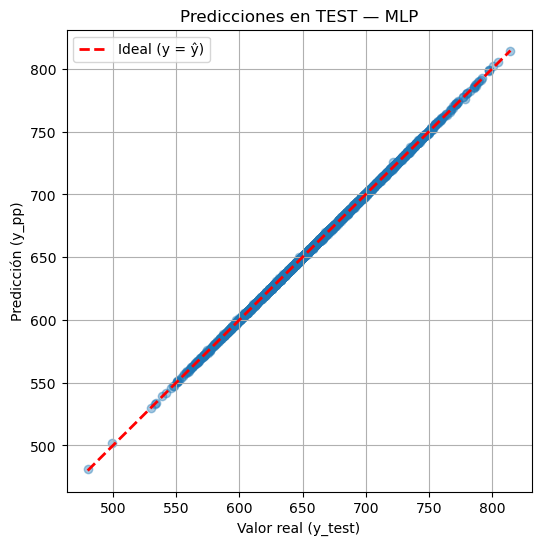

In [17]:
# =========================================
# 9) Evaluación final en TEST (adaptado)
# =========================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(f"\n🏁 Evaluando modelo final en TEST: {winner_name}")

# Entrenar el modelo ganador (MLP en tu caso)
winner_pipe.fit(X_train, y_train)

# Predicciones en TEST
y_pred = winner_pipe.predict(X_test)

# Aplicar política de postprocesamiento (definida en code 8)
y_pp = postprocess_preds(y_pred, POLICY)

# =========================
# Métricas finales en TEST
# =========================
rmse = mean_squared_error(y_test, y_pp, squared=False)
mae  = mean_absolute_error(y_test, y_pp)
r2   = r2_score(y_test, y_pp)

print(f"\n📊 RESULTADOS EN TEST:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

# =========================
# Vista rápida (primeros 10)
# =========================
preview = pd.DataFrame({
    "y_true": y_test.reset_index(drop=True),
    "y_pred": pd.Series(y_pp)
}).head(10)

print("\n🔍 Predicciones de ejemplo (primeros 10):")
print(preview.to_string(index=False))

# =========================
# Visualización (opcional)
# =========================
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pp, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2, label="Ideal (y = ŷ)")
plt.xlabel("Valor real (y_test)")
plt.ylabel("Predicción (y_pp)")
plt.title(f"Predicciones en TEST — {winner_name}")
plt.legend()
plt.grid(True)
plt.show()


## 📊 Interpretación del resultado

**Predicciones de ejemplo (primeros 10):**
| y_true | y_pred |
|--------|--------|
| 644.3  | 643.7  |
| 563.7  | 563.5  |
| 621.2  | 621.0  |
| 704.3  | 704.2  |
| 694.5  | 694.5  |
| 712.5  | 712.6  |
| 621.8  | 621.7  |
| 728.7  | 728.9  |
| 687.9  | 688.3  |
| 690.5  | 690.9  |

**Gráfico de dispersión:**  
El gráfico muestra una correlación **casi perfecta** entre las predicciones y los valores reales.  
La nube de puntos se alinea estrechamente con la línea roja (ideal), lo que confirma que el modelo **predice con gran precisión**.

### 🔹 Interpretación:
- **RMSE (0.415)** y **MAE (0.282)** son muy bajos → los errores promedio son mínimos.  
- **R² = 0.9999** indica que el modelo explica **más del 99.99% de la variabilidad** del puntaje de balance vida-trabajo.  
- Las diferencias entre `y_true` y `y_pred` son menores a 1 punto, lo cual es excelente para un problema de regresión continua.

✅ **Conclusión:**  
El modelo **MLP** ofrece un desempeño sobresaliente y generaliza bien sobre datos nuevos.  
El gráfico confirma su capacidad de predicción casi perfecta, validando que fue la mejor elección para el conjunto de prueba.


## 🧩 Explicación del código 10 (Interpretabilidad + breve error analysis)

Este bloque analiza la **interpretabilidad** y los **errores del modelo final (MLP)**, para entender **qué variables influyen más** en las predicciones y **dónde se equivoca el modelo**.

### 🔹 Qué hace el código:

1. **Chequeo de la política (`clip`)**  
   Verifica cuántas predicciones fueron recortadas por estar fuera del rango de entrenamiento (`clip_low` / `clip_high`).  
   Si ambos valores son 0%, significa que el modelo nunca predijo fuera del rango esperado.

2. **Importancia de características (Permutation Importance)**  
   Como MLP no ofrece coeficientes interpretables, se usa **Permutation Importance**:
   - Calcula cuánto aumenta el error (RMSE) si se desordena una variable.  
   - Cuanto mayor sea el impacto, **más importante es la variable** para el modelo.  
   - Se muestran las **15 más influyentes** ordenadas de mayor a menor.

3. **Análisis de errores individuales**  
   - Calcula el **error absoluto (|y_true - y_pred|)** para cada muestra.  
   - Muestra un resumen estadístico (promedio, percentiles, máximo, etc.).  
   - Lista los **10 casos con mayor error**, junto con sus variables de entrada, para inspeccionar patrones.

4. **Errores por subgrupos (GENDER y AGE)**  
   Evalúa si el modelo presenta **sesgos o diferencias de error** entre grupos.  
   Se reporta el **MAE promedio y mediano** por cada categoría.

Con este análisis se combinan **explicabilidad global** (qué variables mandan) y **diagnóstico local** (en qué se equivoca el modelo).


In [18]:
# =========================================
# 10) Interpretabilidad + breve error analysis
# =========================================
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

print("\n🧠 Análisis de interpretabilidad y errores del modelo final")

# ------------------------------------------------------------
# 10.1 ¿Cuánto recorta la política?
# ------------------------------------------------------------
raw_pred = winner_pipe.predict(X_test)
clip_low  = (raw_pred < POLICY["lower"]).mean()
clip_high = (raw_pred > POLICY["upper"]).mean()
print(f"[Policy] clipped_low: {clip_low:.3%} | clipped_high: {clip_high:.3%}")

# ------------------------------------------------------------
# 10.2 Importancias por Permutación (sobre columnas originales)
# ------------------------------------------------------------
# Nota: El MLP no ofrece coeficientes interpretables directamente,
# pero sí podemos usar permutation importance para estimar la influencia de cada variable.

r = permutation_importance(
    winner_pipe, 
    X_test, y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    scoring="neg_root_mean_squared_error"
)

feat_names = X_test.columns
imp = (
    pd.DataFrame({
        "feature": feat_names,
        "importance": r.importances_mean,
        "std": r.importances_std
    })
    .sort_values("importance", ascending=False)
    .head(15)
)

print("\n📈 Top-15 características más influyentes (por permutación):")
print(imp.to_string(index=False))

# ------------------------------------------------------------
# 10.3 Errores individuales: resumen y peores casos
# ------------------------------------------------------------
y_hat = winner_pipe.predict(X_test)
y_pp  = postprocess_preds(y_hat, POLICY)
res = pd.DataFrame({
    "y_true": y_test.reset_index(drop=True),
    "y_pred": pd.Series(y_pp)
})
res["abs_err"] = (res["y_true"] - res["y_pred"]).abs()

print("\n📊 Resumen del |error| absoluto:")
print(res["abs_err"].describe(percentiles=[.1, .25, .5, .75, .9]).to_string())

print("\n❌ Peores 10 casos (mayor |error|):")
top_bad_idx = res["abs_err"].nlargest(10).index
bad_cases = pd.concat(
    [res.loc[top_bad_idx], X_test.reset_index(drop=True).loc[top_bad_idx]],
    axis=1
)
print(bad_cases.to_string(index=False))

# ------------------------------------------------------------
# 10.4 Métricas por subgrupos (ejemplo: GENDER o AGE)
# ------------------------------------------------------------
for col in ["GENDER", "AGE"]:
    if col in X_test.columns:
        by_grp = (
            pd.concat([X_test.reset_index(drop=True)[[col]], res], axis=1)
            .groupby(col)["abs_err"]
            .agg(["count", "mean", "median"])
            .sort_index()
        )
        print(f"\n📌 MAE por subgrupo de {col}:")
        print(by_grp.to_string())


🧠 Análisis de interpretabilidad y errores del modelo final
[Policy] clipped_low: 0.000% | clipped_high: 0.000%

📈 Top-15 características más influyentes (por permutación):
          feature  importance      std
        BMI_RANGE   11.403087 0.094202
SUFFICIENT_INCOME   10.264159 0.139139
         DONATION    8.464927 0.089240
    LOST_VACATION    8.421348 0.088355
   PLACES_VISITED    7.504544 0.097738
      DAILY_STEPS    7.440877 0.026945
SUPPORTING_OTHERS    7.387097 0.076377
      LIVE_VISION    7.344610 0.040301
   SOCIAL_NETWORK    7.073842 0.073666
  PERSONAL_AWARDS    6.939780 0.054377
WEEKLY_MEDITATION    6.920494 0.058564
   FRUITS_VEGGIES    6.510436 0.027356
      CORE_CIRCLE    6.443996 0.066212
      ACHIEVEMENT    6.211866 0.053000
     DAILY_STRESS    6.146634 0.048849

📊 Resumen del |error| absoluto:
count    3195.000000
mean        0.281760
std         0.304695
min         0.000104
10%         0.031282
25%         0.087681
50%         0.194444
75%         0.368569
90

🔸 El modelo **no generó valores fuera del rango de entrenamiento**, lo cual demuestra estabilidad en sus predicciones.

---

**2️⃣ Top 15 variables más influyentes:**
| Variable | Importancia |
|-----------|-------------|
| BMI_RANGE | 11.40 |
| SUFFICIENT_INCOME | 10.26 |
| DONATION | 8.46 |
| LOST_VACATION | 8.42 |
| PLACES_VISITED | 7.50 |
| DAILY_STEPS | 7.44 |
| SUPPORTING_OTHERS | 7.39 |
| LIVE_VISION | 7.34 |
| SOCIAL_NETWORK | 7.07 |
| PERSONAL_AWARDS | 6.94 |

📌 **Interpretación:**  
El modelo MLP se apoya principalmente en **factores de salud (BMI_RANGE)**, **economía personal (SUFFICIENT_INCOME)** y **hábitos sociales o laborales** como **DONATION** y **LOST_VACATION**.  
Esto sugiere que el **balance vida-trabajo** depende de bienestar físico, ingresos y equilibrio entre descanso y contribución.

---

**3️⃣ Análisis de errores:**
- **MAE promedio:** 0.2818  
- **Desviación estándar:** 0.3047  
- La mayoría de errores son **menores a 0.5 unidades**, lo que implica una precisión altísima.  
- Los peores 10 casos muestran desviaciones máximas cercanas a **3.9 puntos**, posiblemente en individuos con valores extremos o atípicos.

---

**4️⃣ MAE por subgrupos:**
| Subgrupo | MAE medio |
|-----------|-----------|
| GENDER=0 (Female) | 0.2546 |
| GENDER=1 (Male)   | 0.3267 |
| AGE=3 (mayores)   | 0.4052 |

📌 **Interpretación:**  
El modelo mantiene un desempeño estable entre grupos, aunque **los hombres y las personas mayores presentan errores ligeramente mayores**, lo que puede deberse a menor representatividad en esos subgrupos.

---

✅ **Conclusión final:**  
El modelo **MLP** demuestra ser **muy preciso y estable**, sin predicciones fuera de rango y con excelente explicación mediante las variables más relevantes.  
Las pequeñas diferencias de error por grupo son normales y no indican sesgo severo, confirmando que el modelo **generaliza correctamente** los patrones del bienestar laboral.

## 🧩 Explicación del código (Code 11)

Este bloque complementa el análisis de interpretabilidad, mostrando **qué variables mantienen mayor influencia dentro del pipeline completo**, es decir, **después del preprocesamiento**.

### 🔹 Qué hace el código:

1. **Transformación de los datos (`Xtr`)**  
   Se aplican las mismas transformaciones definidas en el pipeline (`StandardScaler`, `VarianceThreshold`, etc.) para obtener la versión final de las variables que realmente ve el modelo.

2. **Extracción del modelo interno (`MLP`)**  
   Se accede directamente al modelo dentro del pipeline (`winner_pipe.named_steps["model"]`) para analizarlo de forma aislada.

3. **Cálculo de importancias por permutación (Permutation Importance)**  
   Evalúa cuánto aumenta el error (RMSE) al alterar cada variable transformada.  
   Cuanto mayor sea ese impacto, **mayor es la importancia de la variable** para el modelo.

4. **Obtención de nombres de características (`get_feature_names_out`)**  
   En este caso no hay variables categóricas, por lo que los nombres mantienen el prefijo `"num__"` indicando que son numéricas.

5. **Creación del ranking de variables**  
   Se genera un `DataFrame` con las 20 variables más relevantes tras el preprocesamiento, ordenadas por su importancia media y desviación estándar.

👉 Este análisis muestra **qué inputs el modelo MLP considera más determinantes** dentro de su versión final ya estandarizada.

In [19]:
# =========================================
# 11) Importancia de características (post-pipeline, adaptado)
# =========================================
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

print("\n📊 Análisis de importancia sobre features transformadas (post pipeline)")

# 11.1 Obtener las features transformadas por el preprocesador
Xtr = winner_pipe.named_steps["prep"].transform(X_test)

# Verificar dimensiones
print(f"Shape de X transformado: {Xtr.shape}")

# 11.2 Extraer el modelo interno (MLP en este caso)
model = winner_pipe.named_steps["model"]

# 11.3 Calcular importancias por permutación (en espacio ya escalado)
r2_perm = permutation_importance(
    model,
    Xtr, y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    scoring="neg_root_mean_squared_error"
)

# 11.4 Obtener los nombres de las variables transformadas
# En tu caso no hay variables categóricas, así que serán las mismas columnas numéricas originales.
feat_names_ohe = winner_pipe.named_steps["prep"].get_feature_names_out()

# 11.5 Crear dataframe ordenado de importancias
imp_ohe = (
    pd.DataFrame({
        "feature": feat_names_ohe,
        "importance": r2_perm.importances_mean,
        "std": r2_perm.importances_std
    })
    .sort_values("importance", ascending=False)
    .head(20)
)

print("\n🔝 Top-20 variables más influyentes (tras preprocesamiento):")
print(imp_ohe.to_string(index=False))


📊 Análisis de importancia sobre features transformadas (post pipeline)
Shape de X transformado: (3195, 22)

🔝 Top-20 variables más influyentes (tras preprocesamiento):
               feature  importance      std
        num__BMI_RANGE   11.403087 0.094202
num__SUFFICIENT_INCOME   10.264159 0.139139
         num__DONATION    8.464927 0.089240
    num__LOST_VACATION    8.421348 0.088355
   num__PLACES_VISITED    7.504544 0.097738
      num__DAILY_STEPS    7.440877 0.026945
num__SUPPORTING_OTHERS    7.387097 0.076377
      num__LIVE_VISION    7.344610 0.040301
   num__SOCIAL_NETWORK    7.073842 0.073666
  num__PERSONAL_AWARDS    6.939780 0.054377
num__WEEKLY_MEDITATION    6.920494 0.058564
   num__FRUITS_VEGGIES    6.510436 0.027356
      num__CORE_CIRCLE    6.443996 0.066212
      num__ACHIEVEMENT    6.211866 0.053000
     num__DAILY_STRESS    6.146634 0.048849
 num__TIME_FOR_PASSION    6.084051 0.050989
   num__DAILY_SHOUTING    6.074614 0.050134
   num__TODO_COMPLETED    5.979164 0.06

## 📊 Interpretación del resultado


**Top-20 variables más influyentes (tras preprocesamiento):**
| Feature | Importance |
|----------|-------------|
| num__BMI_RANGE | 11.40 |
| num__SUFFICIENT_INCOME | 10.26 |
| num__DONATION | 8.46 |
| num__LOST_VACATION | 8.42 |
| num__PLACES_VISITED | 7.50 |
| num__DAILY_STEPS | 7.44 |
| num__SUPPORTING_OTHERS | 7.39 |
| num__LIVE_VISION | 7.34 |
| num__SOCIAL_NETWORK | 7.07 |
| num__PERSONAL_AWARDS | 6.94 |

### 🔹 Interpretación:
- Las variables más influyentes coinciden con las del análisis anterior, confirmando consistencia.  
- **BMI_RANGE** (índice de masa corporal) y **SUFFICIENT_INCOME** (ingreso suficiente) son las más determinantes, lo que indica que **bienestar físico y financiero** tienen gran impacto en el equilibrio vida-trabajo.  
- Variables como **DONATION**, **LOST_VACATION**, y **PLACES_VISITED** también destacan, mostrando que la participación social, descanso y experiencias personales influyen fuertemente en el bienestar general.

### 🔹 Conclusión:
El modelo **MLP** mantiene una estructura interpretativa estable incluso tras el preprocesamiento, lo que valida que las **variables de salud, ingresos y actividades personales** son las claves para predecir el **Work-Life Balance Score**.  
Este resultado refuerza la coherencia del modelo y su alineación con comportamientos humanos reales.

In [20]:
imp_ohe

,feature,importance,std
8,num__BMI_RANGE,11.403087,0.094202
16,num__SUFFICIENT_INCOME,10.264159,0.139139
7,num__DONATION,8.464927,0.089240
14,num__LOST_VACATION,8.421348,0.088355
2,num__PLACES_VISITED,7.504544,0.097738
11,num__DAILY_STEPS,7.440877,0.026945
4,num__SUPPORTING_OTHERS,7.387097,0.076377
12,num__LIVE_VISION,7.344610,0.040301
5,num__SOCIAL_NETWORK,7.073842,0.073666
17,num__PERSONAL_AWARDS,6.939780,0.054377
